In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from IPython.display import display

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('fivethirtyeight')

In [2]:
# lets import the dataset
jobs = pd.read_csv('input/jobs.csv')

In [3]:
# lets check the shapes of the datasets used 
print("Shape of Jobs Data :", jobs.shape)

Shape of Jobs Data : (66, 14)


In [4]:
# lets check the null values in the data
print("Null values in Jobs Data :", jobs.isnull().sum().sum())

Null values in Jobs Data : 0


In [5]:
# lets check the head of the jobs data
jobs.head()

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

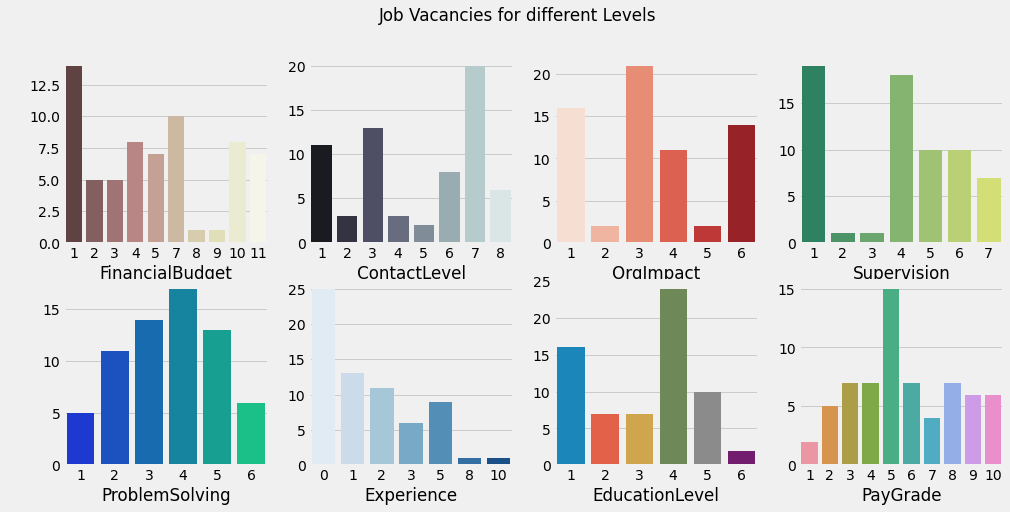

In [6]:
plt.subplot(2, 4, 1)
sns.countplot(jobs['FinancialBudget'], palette = 'pink')
plt.ylabel(" ")

plt.subplot(2, 4, 2)
sns.countplot(jobs['ContactLevel'], palette = 'bone')
plt.ylabel(" ")

plt.subplot(2, 4, 3)
sns.countplot(jobs['OrgImpact'], palette = 'Reds')
plt.ylabel(" ")

plt.subplot(2, 4, 4)
sns.countplot(jobs['Supervision'], palette = 'summer')
plt.ylabel(" ")

plt.subplot(2, 4, 5)
sns.countplot(jobs['ProblemSolving'], palette = 'winter')
plt.ylabel(" ")

plt.subplot(2, 4, 6)
sns.countplot(jobs['Experience'], palette = 'Blues')
plt.ylabel(" ")

plt.subplot(2, 4, 7)
sns.countplot(jobs['EducationLevel'])
plt.ylabel(" ")

plt.subplot(2, 4, 8)
sns.countplot(jobs['PayGrade'])
plt.ylabel(" ")

plt.suptitle('Job Vacancies for different Levels',)
plt.show()

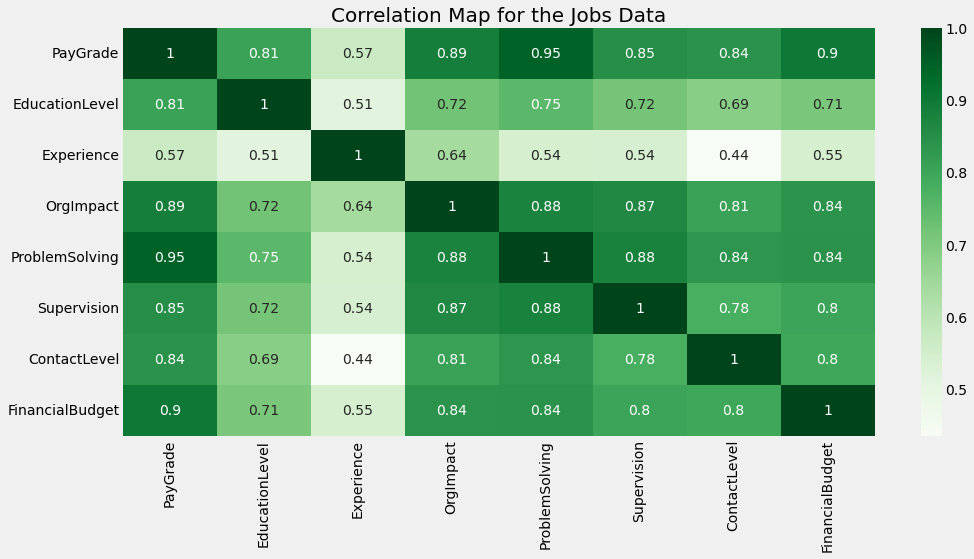

In [7]:
# lets check the correlation map

sns.heatmap(jobs[['PayGrade','EducationLevel',
                  'Experience','OrgImpact','ProblemSolving',
                  'Supervision','ContactLevel','FinancialBudget']].corr(),
            cmap = 'Greens',
            annot = True)
plt.title('Correlation Map for the Jobs Data', fontsize = 20)
plt.show()

In [8]:
# lets group the data wrt jobs family

x = jobs.groupby(['JobFamilyDescription']).agg('mean')
x = x.drop(['ID','JobFamily','JobClass'], axis = 1)
x.style.background_gradient(cmap = 'Reds')

,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget
JobFamilyDescription,,,,,,,,
Accounting And Finance,7.250000,4.000000,2.250000,5.000000,4.500000,5.500000,6.250000,8.250000
Administrative Support,3.000000,2.200000,0.600000,1.600000,1.800000,1.800000,3.200000,3.800000
Baker,6.333333,2.000000,0.000000,2.666667,4.333333,2.333333,4.333333,5.333333
Buildings And Facilities,5.500000,2.375000,0.500000,3.000000,3.750000,4.125000,5.000000,5.000000
Buyer,7.333333,3.333333,3.666667,5.000000,4.333333,5.333333,5.666667,7.333333
Cashier,3.333333,2.666667,2.333333,2.666667,2.666667,3.666667,3.333333,3.000000
Communications And Media,4.500000,2.500000,0.300000,2.000000,2.900000,2.800000,4.000000,3.800000
Corporate Research,5.800000,4.000000,2.400000,3.400000,3.600000,3.800000,3.400000,5.200000
Finance And Accounting,6.666667,4.000000,2.000000,4.000000,4.333333,5.000000,5.333333,7.333333


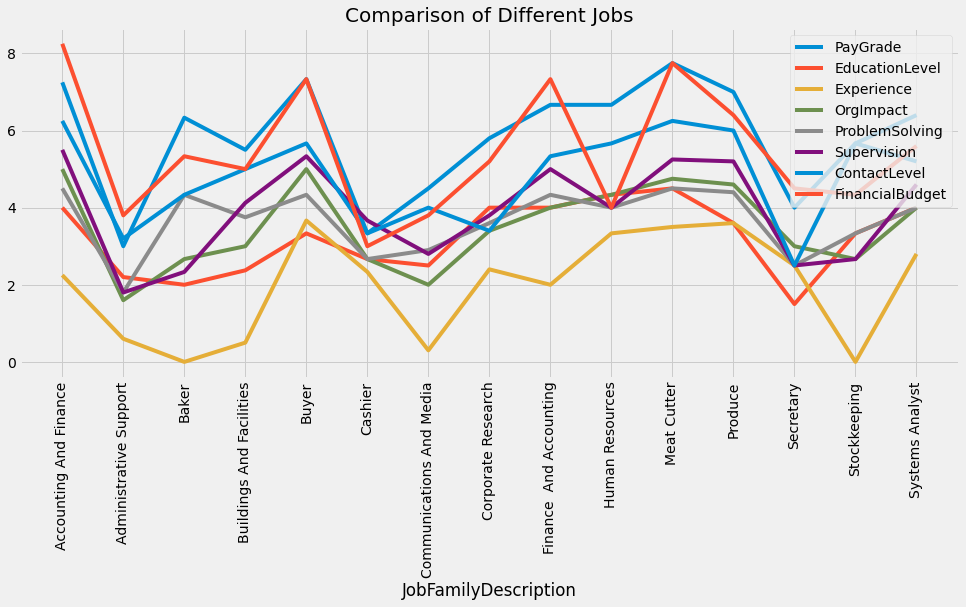

In [9]:
# lets compare all attributes at once
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

x.plot()
plt.xticks(np.arange(15), ('Accounting And Finance', 'Administrative Support', 'Baker',
       'Buildings And Facilities', 'Buyer', 'Cashier',
       'Communications And Media', 'Corporate Research',
       'Finance  And Accounting', 'Human Resources', 'Meat Cutter', 'Produce',
       'Secretary', 'Stockkeeping', 'Systems Analyst'),
        rotation = 90)
plt.title('Comparison of Different Jobs', fontsize = 20)
plt.show()

In [10]:
# lets make an Interactive visualization

@interact_manual
def check(column = jobs.select_dtypes('number').columns[3:],
          column1 = jobs.select_dtypes('number').columns[4:],):
    sns.barplot(jobs[column], jobs[column1])
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Dropdown(description='column', options=('PayGrade', 'EducationLevel', 'Experience', 'Org…

In [11]:
# lets check the head of naukri
data = pd.read_csv('naukri.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'naukri.csv'

In [ ]:
# lets check the shape of the dataset
data.shape

In [ ]:
# lets check the head of the dataset
data.head(50)

## Cleaning the Job Location Address

In [ ]:

data['joblocation_adress'] = data['joblocation_address'].str.split(',')
pd.set_option('max_rows', 300000)
data['joblocation_adress']

In [ ]:
data = data.explode('joblocation_adress')
pd.set_option('max_rows', 30000)
data['joblocation_adress'].value_counts()

In [ ]:

data['joblocation_adress'] = data['joblocation_adress'].replace(('(Bengaluru/Bangalore)',' Bangalore',
                                                                ' Bangalore ','Bangalore ','Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ',' Bengaluru/Bangalore',
                                                                'Bengaluru/Bangalore','Bengaluru','NCR Bangalore',
                                                                'NCR Bangalore ','Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka',' Bengaluru / Bangalore', 
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore',' bangalore',' karnataka',
                                                                ' Bengaluru Bangalore'),
                                                                ('Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                 'Bangalore','Bangalore', 'Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore',))
                                                                
data['joblocation_adress'] = data['joblocation_adress'].replace(('Hyderabad / Secunderabad',' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ','Hyderabad / Secunderabad ',
                                                                ' Hyderabad','Hyderabad ',' Hyderabad ',
                                                                 'Hyderabad/Secunderabad','Hyderabad/Secunderabad ',
                                                                ' Hyderabad/Secunderabad ',' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                 'Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                'Hyderabad','Hyderabad','Hyderabad'))


  
data['joblocation_adress'] = data['joblocation_adress'].replace(('NAVI MUMBAI',' NAVI MUMBAI','NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI',' NAVI MUMBAI ','Mumbai , Mumbai',
                                                                 ' Mumbai',' Mumbai ','Mumbai ','mumbai','Navi Mumbai',
                                                                ' Navi Mumbai',' Navi Mumbai ','Navi Mumbai ', 
                                                                 ' Mumbai Suburbs','Mumbai Suburbs ','Mumbai Suburbs',
                                                                ' Mumbai Suburbs ','mumbai',' mumbai','mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                 'Mumbai','Mumbai','Mumbai', 'Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai', 'Mumbai'))

data['joblocation_adress'] = data['joblocation_adress'].replace(('Noida','Noida ',' Noida',' Delhi','Delhi','Delhi ',' Delhi ',
                                                                 'Gurgaon',' Gurgaon',' Gurgaon ','Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida',' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)',' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ','Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida','Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR','NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR','NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)','NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR','Delhi/NCR ',
                                                                ' Noida/Greater Noida','Greater Noida',' Greater Noida',
                                                                 ' Greater Noida ','Greater Noida ','Ghaziabad',' Ghaziabad',
                                                                 'Ghaziabad ',' Ghaziabad ','Faridabad','Faridabad ',
                                                                 ' Faridabad',' Faridabad ',' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ',' delhi',' Delhi/NCR','Delhi NCR'
                                                                ),
                                                                ('NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR', 'NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR'))


data['joblocation_adress'] = data['joblocation_adress'].replace(('Chennai ',' Chennai',' Chennai ',' Chennai',
                                                                 'chennai ',' chennai',' chennai ',' chennai',),
                                                                ('Chennai', 'Chennai','Chennai','Chennai','Chennai',
                                                                'Chennai','Chennai','Chennai',))

data['joblocation_adress'] = data['joblocation_adress'].replace(('Pune ',' Pune',' Pune '),('Pune','Pune','Pune'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Kolkata ',' Kolkata',' Kolkata ',
                                                                ' kolkata','kolkata ',' kolkata'),
                                                                ('Kolkata','Kolkata','Kolkata',
                                                                  'Kolkata','Kolkata','Kolkata'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Ahmedabad','Ahmedabad ',' Ahmedabad '),('Ahmedabad',
                                                                                         'Ahmedabad','Ahmedabad'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Chandigarh ',' Chandigarh',' Chandigarh '),
                                                                ('Chandigarh','Chandigarh','Chandigarh'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Surat ',' Surat',' Surat '),
                                                                ('Surat','Surat','Surat'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ',' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ', 
                                                                 ' Ernakulam / Kochi/ Cochin',' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi','Kochi','Kochi','Kochi','Kochi','Kochi','Kochi',
                                                                 'Kochi',))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Lucknow ',' Lucknow',' Lucknow '),
                                                                ('Lucknow','Lucknow','Lucknow'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Jaipur ',' Jaipur',' Jaipur ','jaipur ',' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur','Jaipur','Jaipur','Jaipur','Jaipur','Jaipur'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Vijayawada ',' Vijayawada',' Vijayawada '),
                                                                ('Vijayawada','Vijayawada','Vijayawada'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Visakhapatnam ',' Visakhapatnam',' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ',' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                 'Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                ))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Bhubaneshwar',' Bhubaneshwar',' Bhubaneshwar '),
                                                                ('Bhubaneshwar','Bhubaneshwar','Bhubaneshwar'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Patna',' Patna',' Patna '),
                                                                ('Patna','Patna','Patna'))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Trivandrum',' Trivandrum',' Trivandrum '),
                                                                ('Trivandrum','Trivandrum','Trivandrum'))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Mangalore',' Mangalore',' Mangalore '),
                                                                ('Mangalore','Mangalore','Mangalore'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Indore',' Indore',' Indore '),
                                                                ('Indore','Indore','Indore'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Guwahati',' Guwahati',' Guwahati '),
                                                                ('Guwahati','Guwahati','Guwahati'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Nagpur',' Nagpur',' Nagpur '),
                                                                ('Nagpur','Nagpur','Nagpur'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Raipur',' Raipur',' Raipur '),
                                                                ('Raipur','Raipur','Raipur'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Thane',' Thane',' Thane '),
                                                                ('Thane','Thane','Thane'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Bhopal',' Bhopal',' Bhopal '),
                                                                ('Bhopal','Bhopal','Bhopal'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Vadodara/Baroda',' Vadodara/Baroda',' Vadodara/Baroda ',
                                                                ' Vadodara','Vadodara ',' Vadodara '),
                                                                ('Vadodara','Vadodara','Vadodara','Vadodara',
                                                                 'Vadodara','Vadodara',))
                                                                                                                                  
pd.set_option('max_rows', 2400)
data['joblocation_adress'].value_counts()

In [ ]:
counts = data['joblocation_adress'].value_counts()
data = data.loc[data['joblocation_adress'].isin(counts.index[counts > 25])]
display(data['joblocation_adress'].value_counts())

sns.countplot(data['joblocation_adress'], palette = 'inferno')
plt.title('Locations with Highest Jobs', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()

## Cleaning the Experience Column

In [ ]:
data['experience']

In [ ]:
pd.set_option('max_rows', 40000)
data['experience'].str.split(' ')

In [ ]:
data['experience'] = data['experience'].str.split(" ")
data['Min Experience'] = data['experience'].apply(lambda x: x[0])
data['Max Experience'] = data['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])

In [ ]:
data['Min Experience'].value_counts()

In [ ]:
data['Max Experience'].value_counts()

In [ ]:
data['Min Experience'] = data['Min Experience'].replace('Not',0)
data['Max Experience'] = data['Max Experience'].replace(('Mentioned','-1'), (5,5))

# lets convert thenm into numerical data types
data['Min Experience'] = data['Min Experience'].astype('int')
data['Max Experience'] = data['Max Experience'].astype('int')

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.countplot(data['Min Experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.subplot(1, 2, 2)
sns.countplot(data['Max Experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.suptitle('Distribution of Experience')
plt.show()

## Cleaning the Education Column

In [ ]:
data['education']

In [ ]:
data['education'] = data['education'].fillna('UG: Any Graduate - Any Specialization')
data['education'].isnull().sum()

In [ ]:
data['Education'] = data['education'].str.split(' ')
data['Education'] = data['Education'].apply(lambda x: x[1] if len(x) > 1 else x[0])

data['Education'].value_counts(dropna = False)

In [ ]:
# let's do some cleaning

data['Education'] = data['Education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,','Postgraduate',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA',
                                              'B.Tech','Doctorate','B.Tech'))

data['Education'].value_counts()

In [ ]:
counts = data['Education'].value_counts()
data = data.loc[data['Education'].isin(counts.index[counts >= 25])]
display(data['Education'].value_counts())

plt.rcParams['figure.figsize'] = (12,6)
x = data[data['Education'] != 'Any']
sns.countplot(y = x['Education'], palette = 'inferno')
plt.title('Vacancies for Different Education', fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

## Cleaning the Industry Column

In [ ]:
data['industry']

In [ ]:
data['industry'].str.split(' / ')

In [ ]:
data['industry'].isnull().sum()

In [ ]:
data['industry'] = data['industry'].fillna(data['industry'].mode()[0])

data['industry'].isnull().sum()

In [ ]:
data['Industry'] = data['industry'].str.split(' / ')
data['Industry'] = data['Industry'].apply(lambda x: x[0])

display(data['Industry'].value_counts())

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Top Sectors for Jobs', fontsize = 20)
sns.barplot(y = data['Industry'].value_counts().head(10).index,
            x = data['Industry'].value_counts().head(10).values,
            palette = 'copper')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Minimum Experience required from each Industry')
sns.barplot(data['Industry'], data['Min Experience'], palette = 'magma')
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel(' ')
plt.show()

## Cleaning the Skills Column

In [ ]:
data['skills'].head(10)

In [ ]:
data['skills'] = data['skills'].fillna(data['skills'].mode()[0])
data['skills'].isnull().sum()

In [ ]:
data['Skills'] = data['skills'].str.split(" - ")
data['Skills'] = data['Skills'].apply(lambda x: x[1] if len(x) > 1 else x[0])
display(data['Skills'].value_counts())

plt.rcParams['figure.figsize'] = (15, 4)
plt.title('Requirement of Overall Skills', fontsize = 20)
data['Skills'].value_counts().head(25).plot(kind = 'bar', color = 'black')
plt.grid()
plt.yticks(fontsize = 15)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [ ]:
data[['Skills','numberofpositions']].groupby(['Skills']).agg('sum').sort_values(by = 'numberofpositions',
                                 ascending = False).head(15).style.background_gradient(cmap = 'copper')

## Cleaning rest of the columns

In [ ]:
data.columns

In [ ]:
# lets remove the columns which are not required

data = data.drop(['education',
                  'joblocation_address',
                  'experience',
                  'industry',
                  'skills',
                  'jobid',
                  'uniq_id',
                  'site_name'], axis = 1)

data.columns

In [ ]:
data.isnull().sum()

In [ ]:
data['numberofpositions'] = data['numberofpositions'].fillna(1)
data['numberofpositions'] = data['numberofpositions'].astype('int')

# If the job post date and pay rate is missing it is useless, so lets remove the records where jobppostdate is not mentioned
data = data.dropna()
data.isnull().sum().sum()

In [ ]:
data['postdate'].head()

In [ ]:
data['postdate'] = data['postdate'].str.split(" ")
data['postdate'] = data['postdate'].apply(lambda x: x[0])
data['postdate'].head()

In [ ]:
# By looking at the above result we can easily analyze that there are some duplicate

# lets print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

# so lets remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

# lets print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

## Let's Gather some Vital Information from Data 

In [ ]:
data['company'].nunique()

In [ ]:
data['jobtitle'].nunique()

In [ ]:
data['Skills'].nunique()

In [ ]:
data['Industry'].nunique()

In [ ]:
data['joblocation_adress'].nunique()

In [ ]:
data['numberofpositions'].sum()

In [ ]:
# checking the most popular job titles

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'gold',
                      max_words = 50,
                      stopwords = stopwords,
                      width = 2000,
                      height = 2000).generate(str(data['jobtitle']))

wordcloud2 = WordCloud(background_color = 'lightgrey',
                       stopwords = stopwords,
                       width = 2000,
                       height = 2000).generate(str(data['company']))


plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud)
plt.title('Job Titles', fontsize = 20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2)
plt.title('Companies', fontsize = 20)
plt.axis('off')

plt.suptitle('Words Cloud', fontsize = 20)
plt.show()

In [ ]:
# lets check the top 20 companies providing jobs

plt.rcParams['figure.figsize'] = (15, 12)
sns.barplot(y = data['company'].value_counts().head(30).index,
            x = data['company'].value_counts().head(30).values,
            palette = 'inferno')
plt.title('Top Companies providing Jobs', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

## Searching for Jobs

In [ ]:
pd.set_option('max_rows', 150)
@interact

def check(City = list(data['joblocation_adress'].value_counts().index),
          Industry = list(data['Industry'].value_counts().index),
          Experience = list(data['Min Experience'].value_counts().sort_values(ascending = False).index),
          Vacancies = 10
          ):
    return data.loc[(data['numberofpositions'] > Vacancies)
                   & (data['joblocation_adress'] == City)
                   & (data['Industry'] == Industry)
                   & (data['Min Experience'] == Experience)][[
                                                      'company',
                                                      'jobtitle',
                                                      'Education',
                                                      'payrate',
                                                      'numberofpositions',
                                                      ]]

## Correlation between Industries and Education

In [ ]:
# lets create a matrix of skills vs jobtitle
# this matrix will be used for predicting the best suited job titles with respect to the skills
x = pd.crosstab(data['Education'],data['Industry'])
x

In [ ]:
@interact
def recommendation_jobs(Industry = list(data['Industry'].value_counts().index)):
    job = x[Industry]
    similar_jobs = x.corrwith(job)
    similar_jobs = similar_jobs.sort_values(ascending=False)
    similar_jobs = similar_jobs.iloc[2:]
    return similar_jobs.head(3)